In [6]:
!pwd

/Users/user/OneDrive/School/School/Fall18/INF553/inf553-adjusted-ratings/sentiment-stat-generation


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Qyelp = pd.read_json("user-google-sentiment.json")

In [13]:
print(Qyelp)

                                          msQe1u7Z_XuqjGoqhB0J5g  \
averages                      {'score': 0.11, 'magnitude': 6.11}   
data           [[-0.10000000149011601, 0.699999988079071, -0....   
max             {'score': 0.7000000000000001, 'magnitude': 10.6}   
median                         {'score': 0.1, 'magnitude': 6.45}   
min             {'score': -0.6000000000000001, 'magnitude': 2.0}   
numberReviews                                                 10   
stdev          {'score': 0.428, 'magnitude': 2.9267000000000003}   

                                         TlvV-xJhmh7LCwJYXkV-cg  \
averages       {'score': 0.30000000000000004, 'magnitude': 1.0}   
data                               [[0.300000011920928], [1.0]]   
max            {'score': 0.30000000000000004, 'magnitude': 1.0}   
median         {'score': 0.30000000000000004, 'magnitude': 1.0}   
min            {'score': 0.30000000000000004, 'magnitude': 1.0}   
numberReviews                                        

In [14]:
print(len(Qyelp.keys()))

188


In [34]:

QDist = pd.DataFrame(Qyelp.keys(), columns=['user_id'])
QDist['Reviews'] = np.zeros(len(Qyelp.keys()))
QDist['Mean'] = np.zeros(len(Qyelp.keys()))
QDist['Std Dev'] = np.zeros(len(Qyelp.keys()))
QDist['Max'] = np.zeros(len(Qyelp.keys()))
QDist['Median'] = np.zeros(len(Qyelp.keys()))
QDist['Min'] = np.zeros(len(Qyelp.keys()))

for i,v in enumerate(Qyelp.keys()):
    QDist['Reviews'][i] = Qyelp[v]['numberReviews']
    QDist['Mean'][i] = Qyelp[v]['averages']['score']
    QDist['Std Dev'][i] = Qyelp[v]['stdev']['score']
    QDist['Max'][i] = Qyelp[v]['max']['score']
    QDist['Min'][i] = Qyelp[v]['min']['score']
    QDist['Median'][i] = Qyelp[v]['median']['score']

QDist.head(5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14

,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,10.0,0.11,0.4280,0.7,0.10,-0.6
1,TlvV-xJhmh7LCwJYXkV-cg,1.0,0.30,0.0000,0.3,0.30,0.3
2,NhOc64RsrTT1Dls50yYW8g,2.0,0.15,0.9192,0.8,0.15,-0.5
3,LKcdcMrq2xDzIThSHiZmLg,1.0,0.90,0.0000,0.9,0.90,0.9
4,hxqo4NyJFfeOmuoVi--s1A,1.0,0.20,0.0000,0.2,0.20,0.2


In [35]:
json = QDist.to_json("user_summary.json", orient='records')

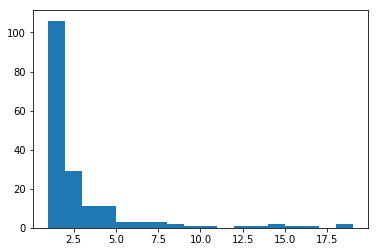

In [36]:
plt.hist(QDist['Reviews'], bins=np.arange(1,20,1))
plt.show()

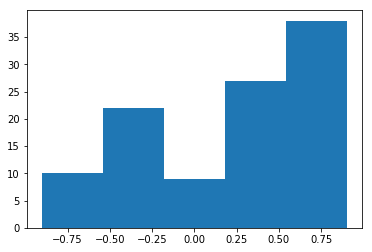

In [37]:
plt.hist(QDist[QDist['Reviews'] == 1]['Mean'], bins=5)
plt.show()

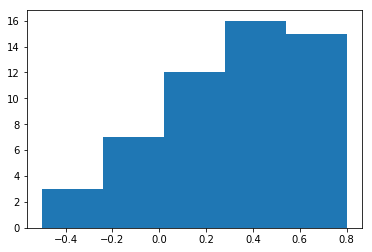

In [38]:
plt.hist(QDist[QDist['Reviews'] > 2]['Median'], bins=5)
plt.show()

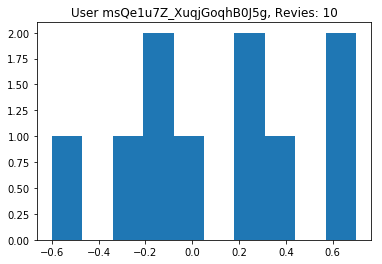

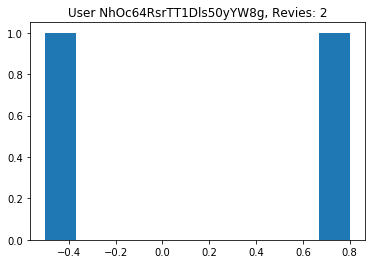

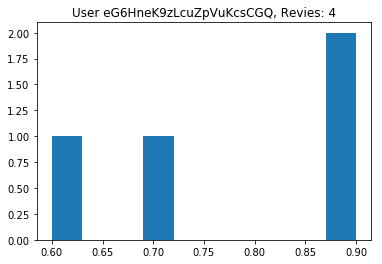

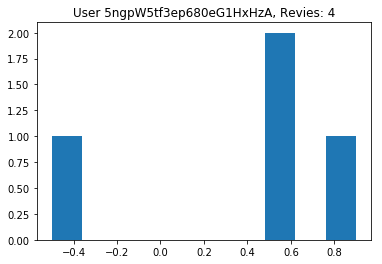

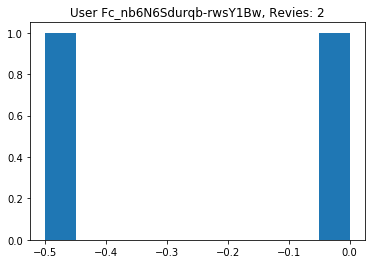

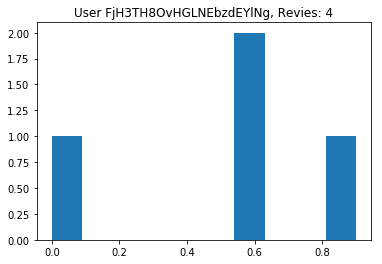

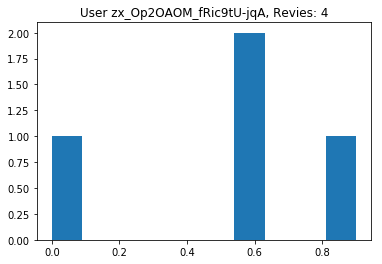

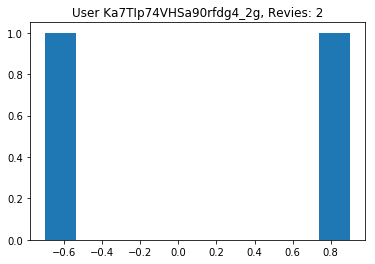

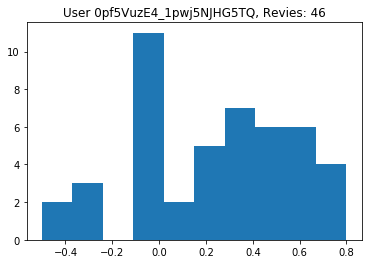

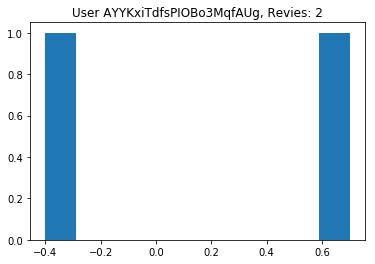

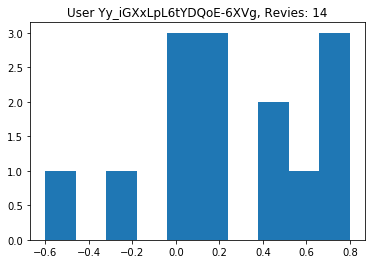

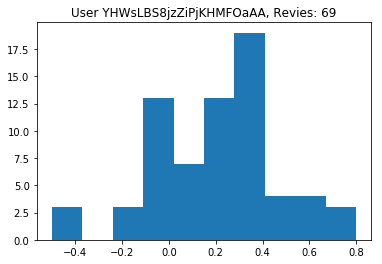

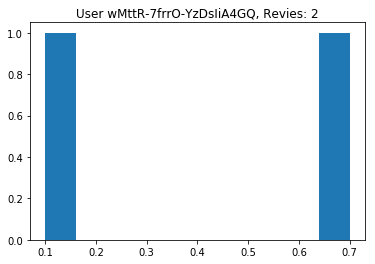

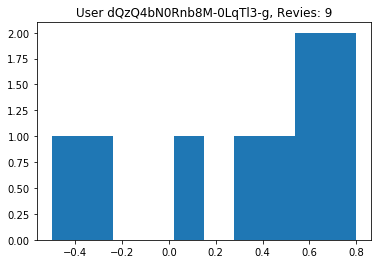

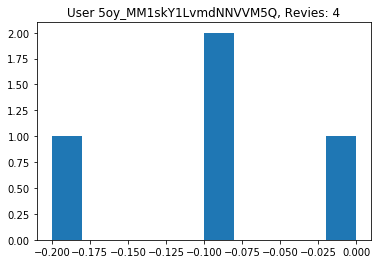

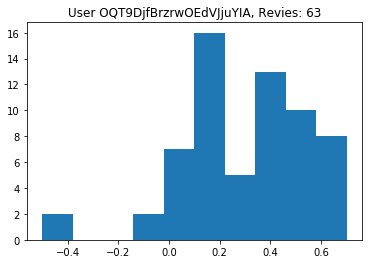

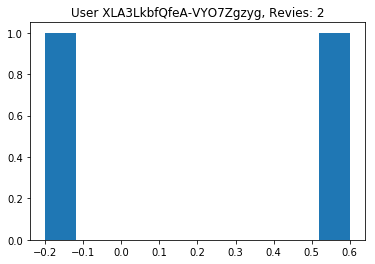

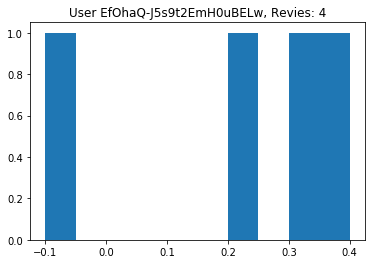

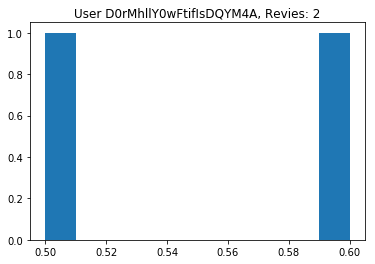

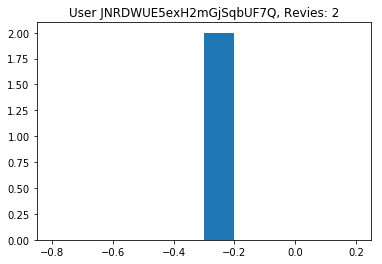

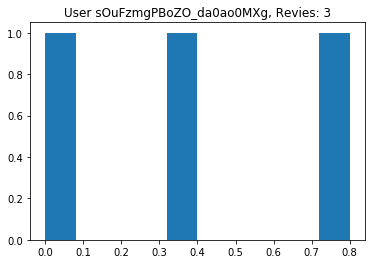

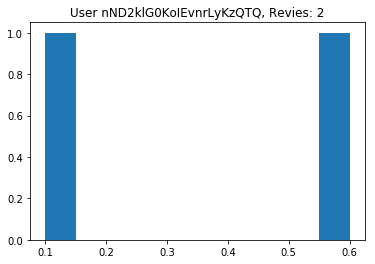

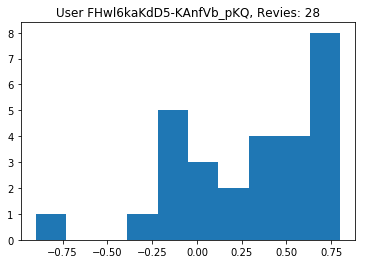

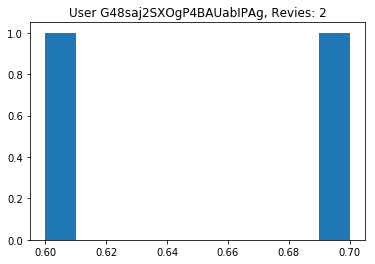

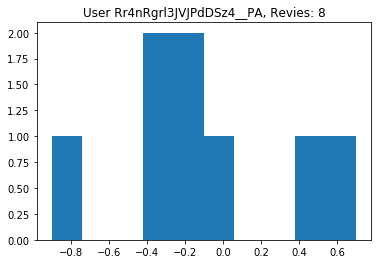

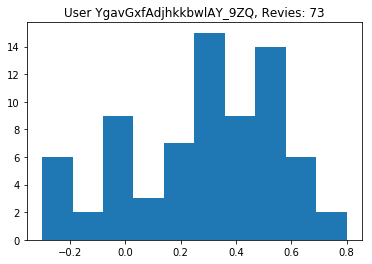

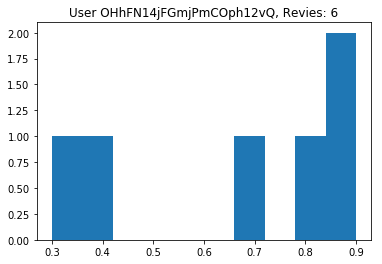

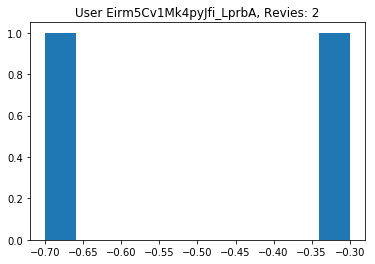

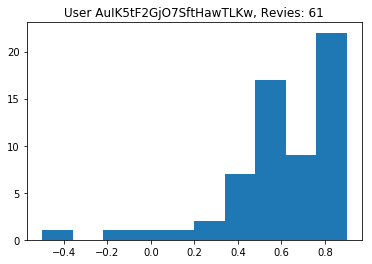

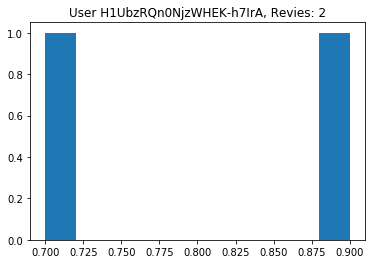

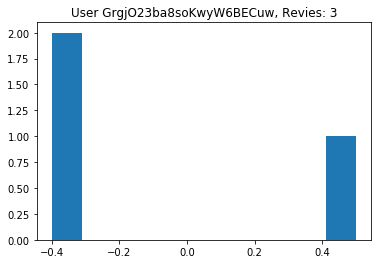

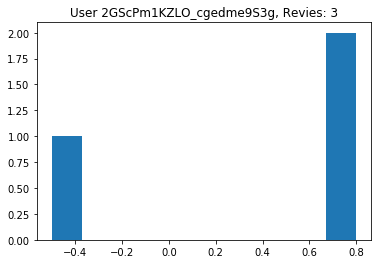

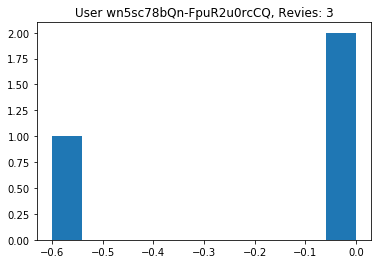

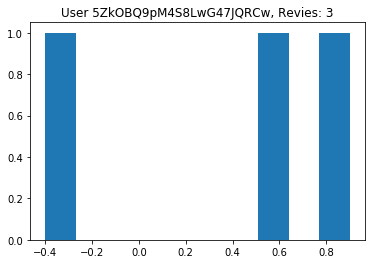

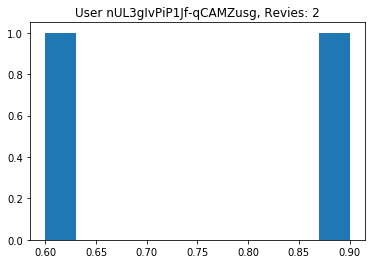

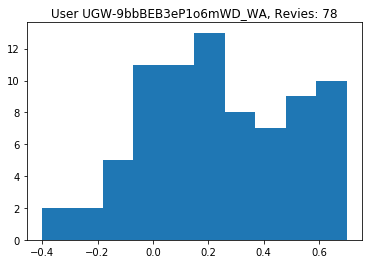

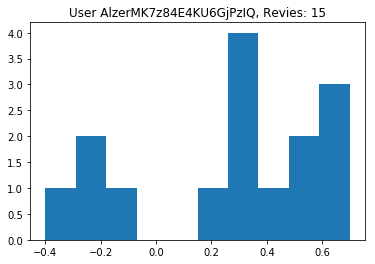

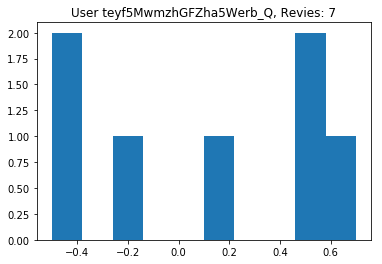

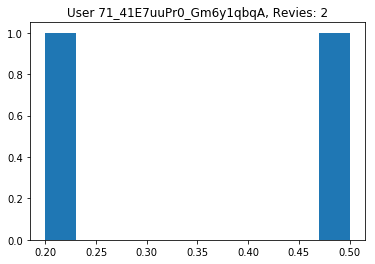

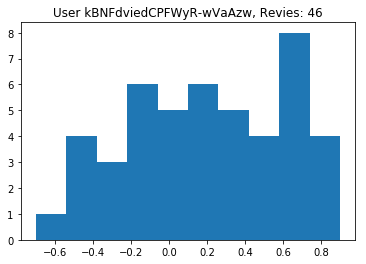

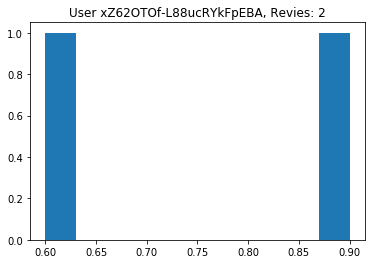

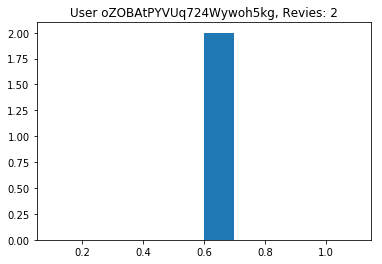

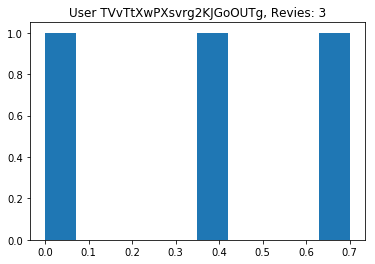

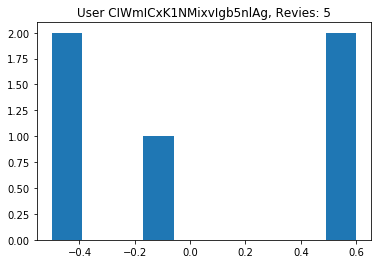

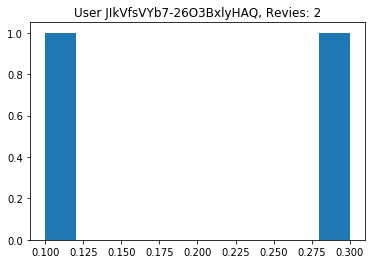

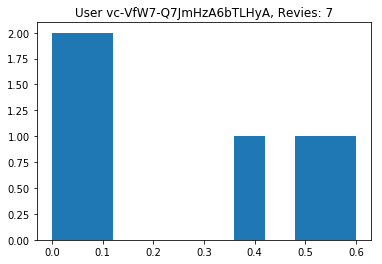

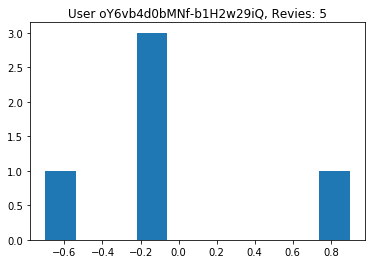

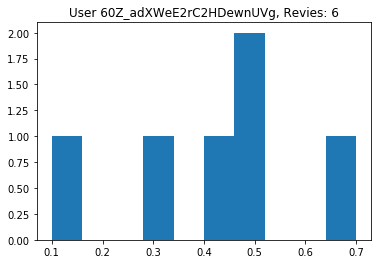

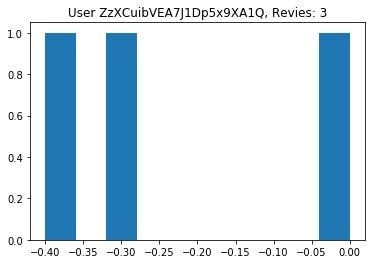

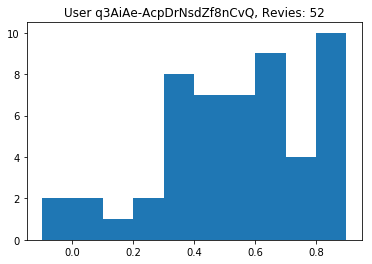

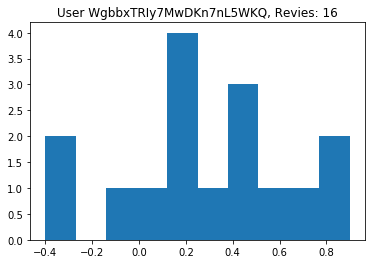

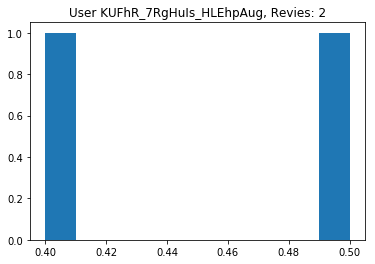

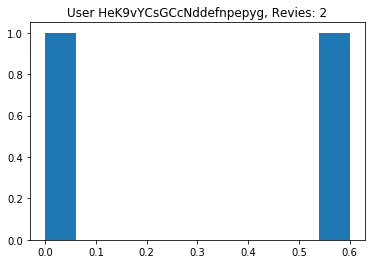

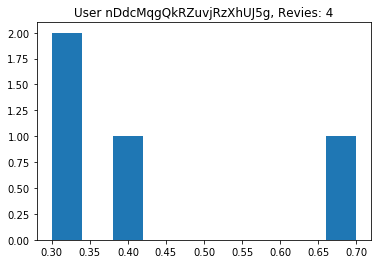

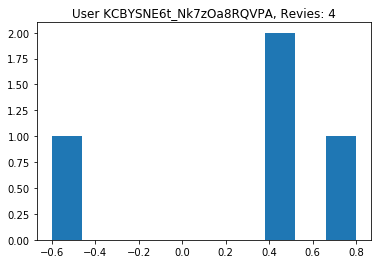

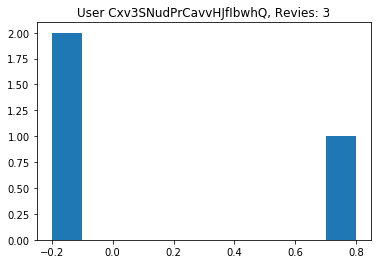

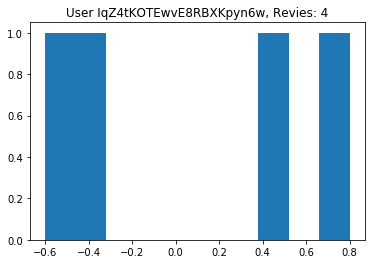

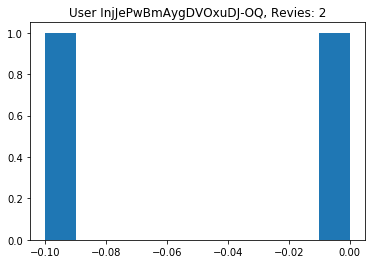

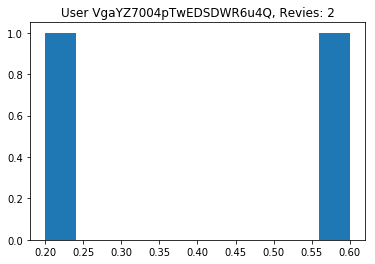

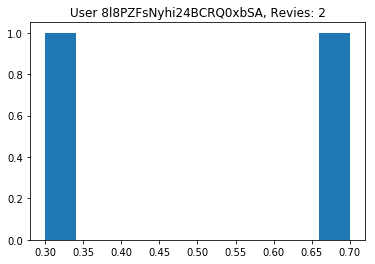

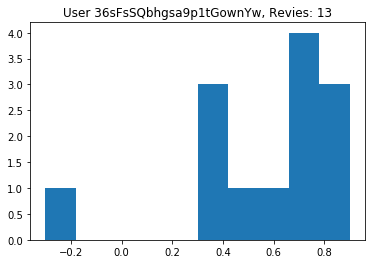

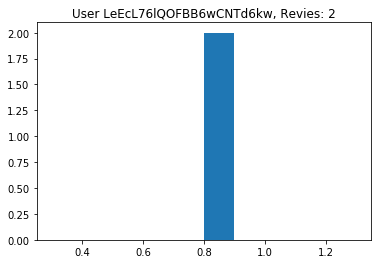

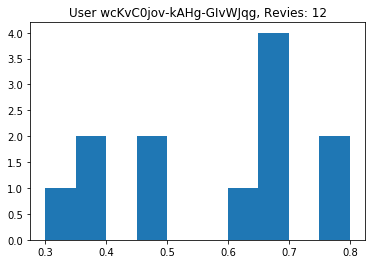

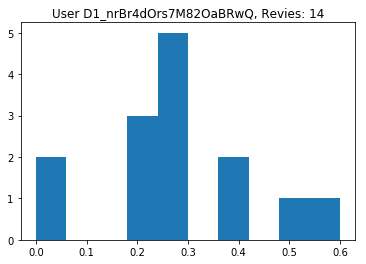

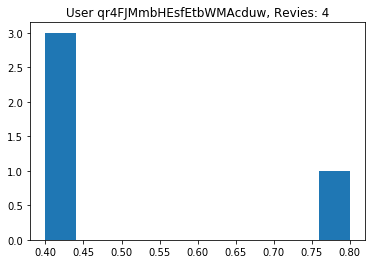

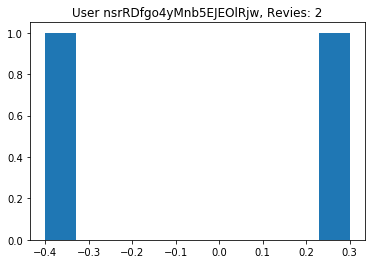

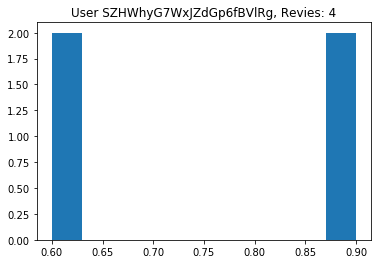

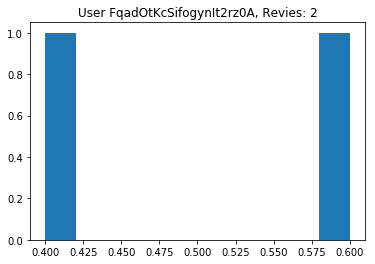

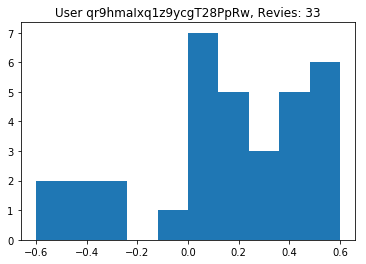

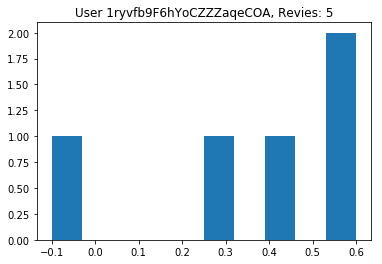

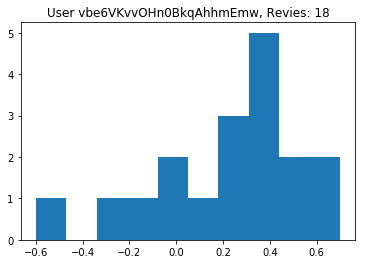

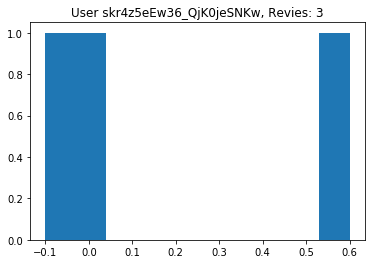

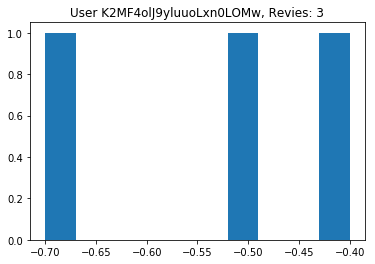

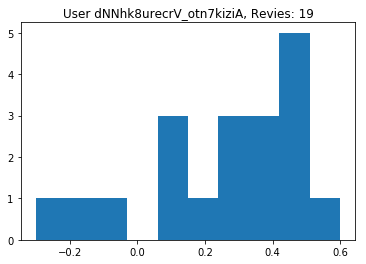

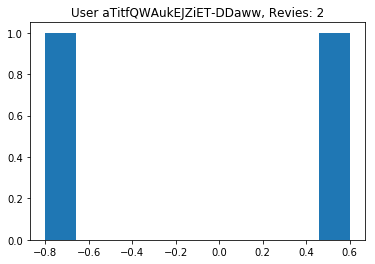

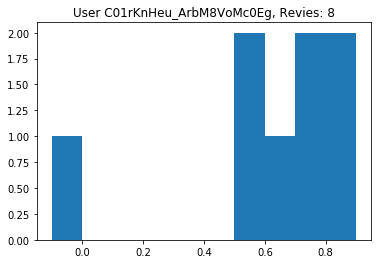

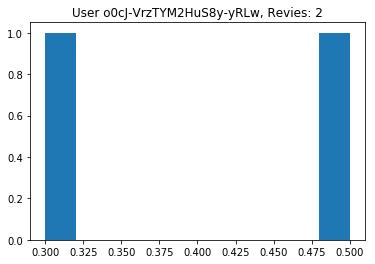

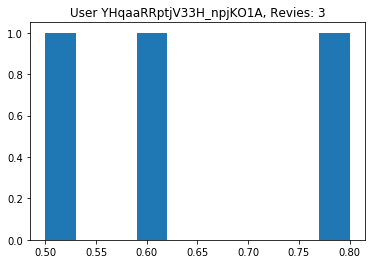

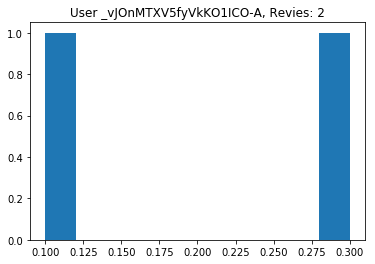

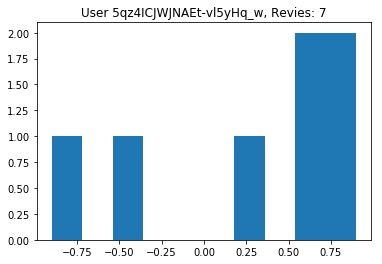

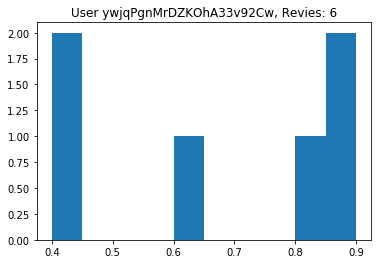

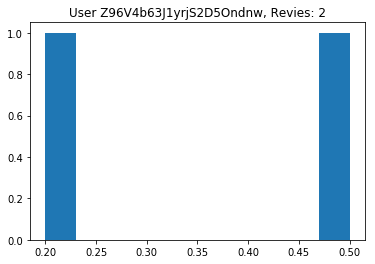

In [47]:
for user in QDist[QDist['Reviews']>1]['user_id']:
    plt.hist(Qyelp[user]['data'][0])
    plt.title("User %s, Revies: %d" % (user,len(Qyelp[user]['data'][0])))
    plt.show()

In [50]:
print("Users with average review between .5 and 1.0: %d" % len(QDist[(QDist['Mean'] >= 0.5)]['user_id'].unique()))
print("Users with average review above 0 and 0.5: %d" % len(QDist[(QDist['Mean'] >= 0) & (QDist['Mean'] < 0.5)]['user_id'].unique()))
print("Users with average review below -0.5 and 0: %d" % len(QDist[(QDist['Mean'] >= -0.5) & (QDist['Mean'] < 0)]['user_id'].unique()))
print("Users with average review below -1.0 and -0.5: %d" % len(QDist[QDist['Mean'] < -0.5]['user_id'].unique()))

Users with average review between .5 and 1.0: 70
Users with average review above 0 and 0.5: 70
Users with average review below -0.5 and 0: 37
Users with average review below -1.0 and -0.5: 11
